In [299]:
# 載入需要的套件
import os
import numpy as np 
import pandas as pd
import copy
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [347]:
# 設定 data_path
dir_data = './data/'
Train = os.path.join(dir_data, 'train.csv')
Test = os.path.join(dir_data, 'test.csv')

# 讀取檔案
Train_data = pd.read_csv(Train)
Test_data = pd.read_csv(Test)

In [342]:
Corr_train = copy.deepcopy(Train_data)
corr_tar = Corr_train.corr()['total_price']
print(corr_tar.sort_values(na_position='first'))

NanCol = corr_tar.sort_values(na_position='first')[:22]

I_index_5000                  NaN
I_index_10000                 NaN
II_index_5000                 NaN
II_index_10000                NaN
III_index_5000                NaN
III_index_10000               NaN
IV_index_10000                NaN
V_index_5000                  NaN
V_index_10000                 NaN
VI_index_5000                 NaN
VI_index_10000                NaN
VII_index_5000                NaN
VII_index_10000               NaN
VIII_index_5000               NaN
VIII_index_10000              NaN
IX_index_10000                NaN
X_index_5000                  NaN
X_index_10000                 NaN
XII_index_5000                NaN
XII_index_10000               NaN
XIV_index_5000                NaN
XIV_index_10000               NaN
highschool_rate         -0.164966
junior_rate             -0.147248
elementary_rate         -0.131030
divorce_rate            -0.109466
parking_way             -0.090435
IV_MIN                  -0.059686
VI_MIN                  -0.056205
town          

In [348]:
train_Y = np.log1p(Train_data['total_price'])
ids = Test_data['building_id']
Train_data = Train_data.drop(['building_id', 'total_price'] , axis=1)
Test_data = Test_data.drop(['building_id'] , axis=1)

for col in NanCol.index:
    Train_data = Train_data.drop(col, axis=1)
    Test_data = Test_data.drop(col , axis=1)

df = pd.concat([Train_data,Test_data])

df.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_10000,XIV_MIN
0,8,21,18674,4,3,2,6271,2,NaN,NaN,...,1,3,21,58,1,157,1,2483,6011,34.469803
1,8,7,18800,5,1,2,7885,2,NaN,NaN,...,1,1,7,28,1,115,1,15872,32221,40.073573
2,8,7,19289,4,1,2,6028,2,NaN,NaN,...,0,2,27,78,1,212,1,15760,32228,54.462081
3,8,21,20385,24,0,2,18325,0,NaN,81138.889762,...,0,1,2,20,1,125,1,2568,7271,99.628966
4,1,21,20657,2,4,2,6880,2,NaN,NaN,...,0,0,2,18,1,47,1,2587,7442,124.131236


In [349]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
new_columns = list(df.columns[list(df.apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns : {}".format(len(new_columns)))
df = df[new_columns]
df.head()

Numbers of remain columns : 162


,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIII_MIN,XIV_10,XIV_50,XIV_100,XIV_250,XIV_500,XIV_1000,XIV_5000,XIV_10000,XIV_MIN
0,8,21,18674,4,3,2,6271,2,NaN,NaN,...,112.582703,0,1,3,21,58,157,2483,6011,34.469803
1,8,7,18800,5,1,2,7885,2,NaN,NaN,...,32.370655,0,1,1,7,28,115,15872,32221,40.073573
2,8,7,19289,4,1,2,6028,2,NaN,NaN,...,174.954657,0,0,2,27,78,212,15760,32228,54.462081
3,8,21,20385,24,0,2,18325,0,NaN,81138.889762,...,1247.796459,0,0,1,2,20,125,2568,7271,99.628966
4,1,21,20657,2,4,2,6880,2,NaN,NaN,...,1766.374491,0,0,0,2,18,47,2587,7442,124.131236


162


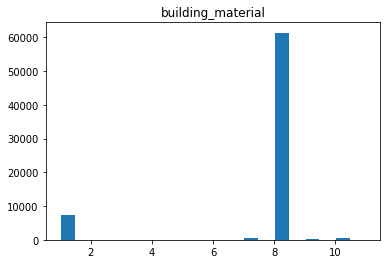

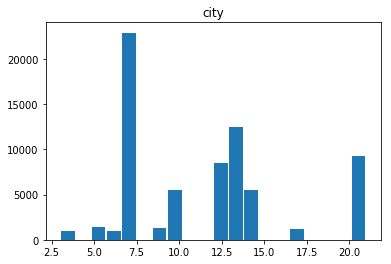

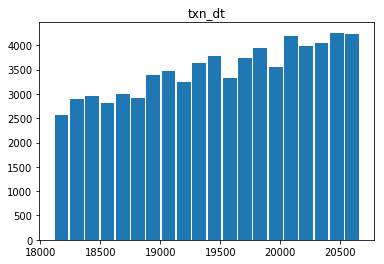

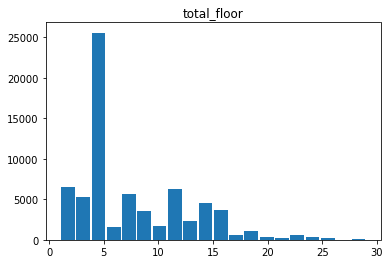

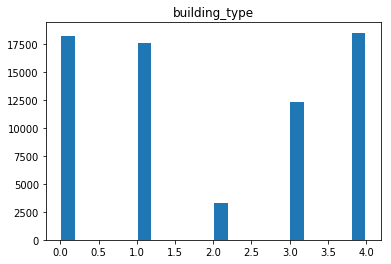

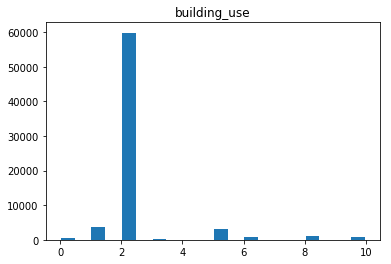

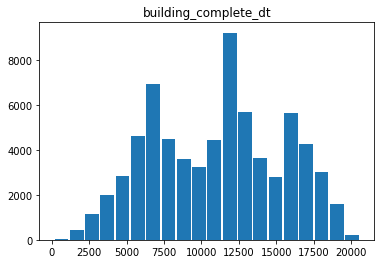

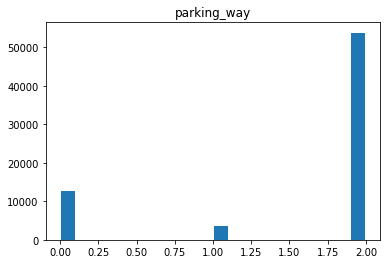

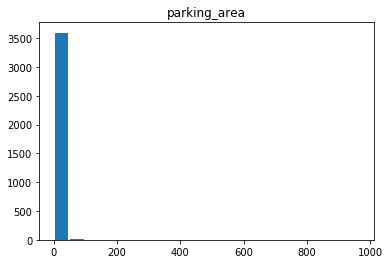

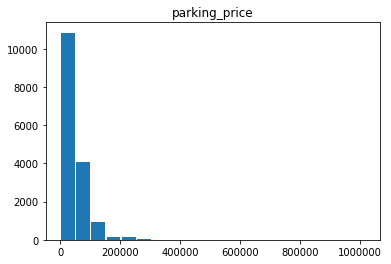

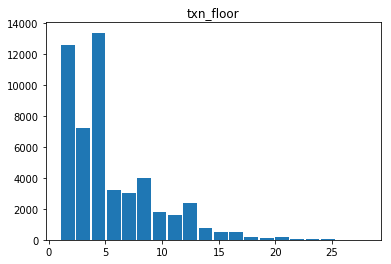

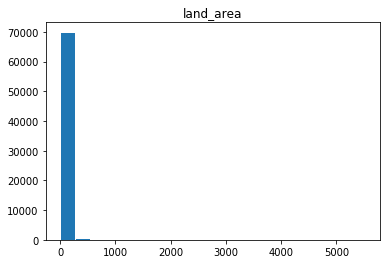

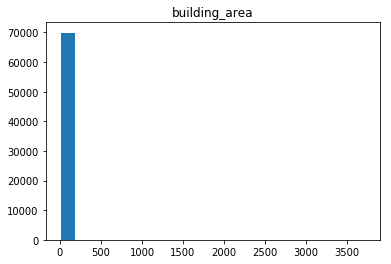

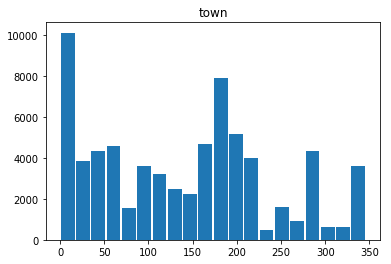

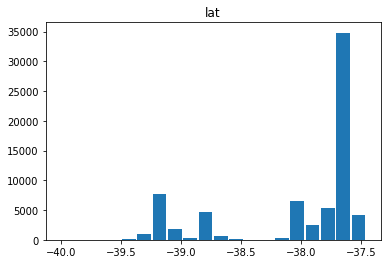

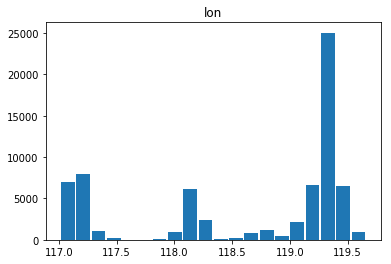

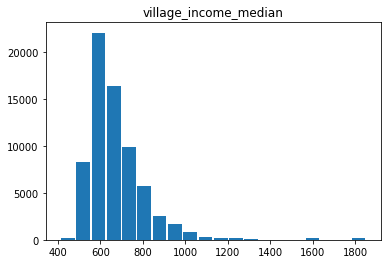

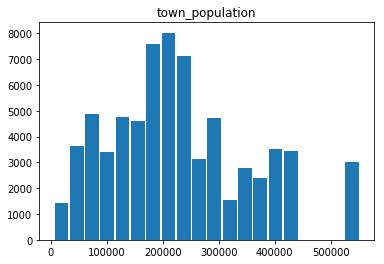

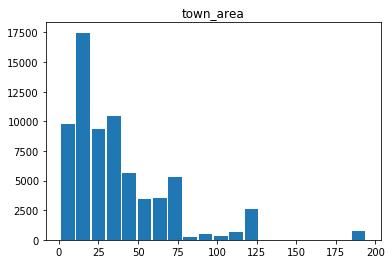

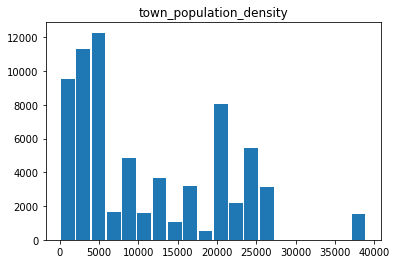

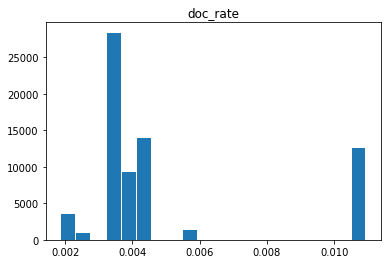

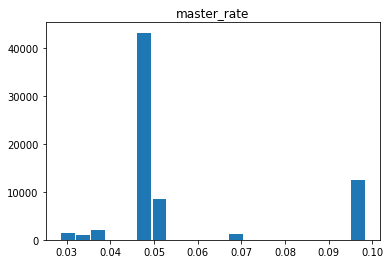

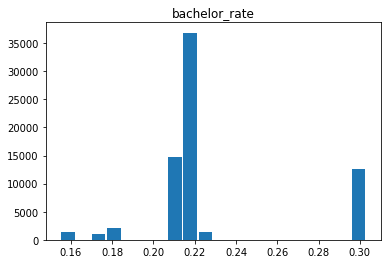

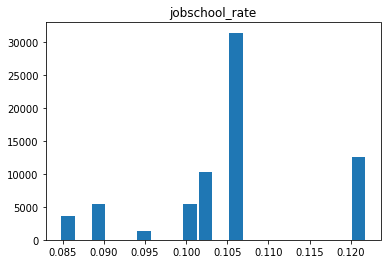

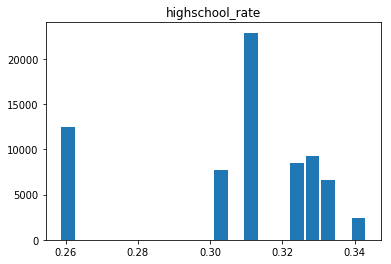

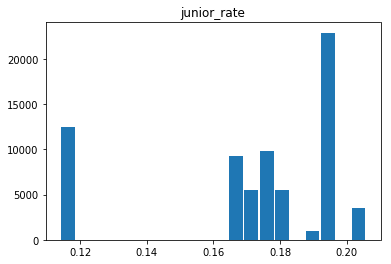

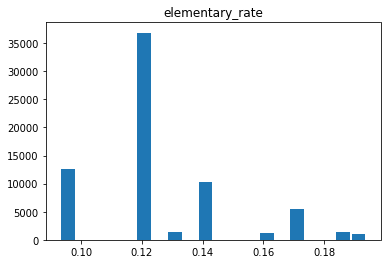

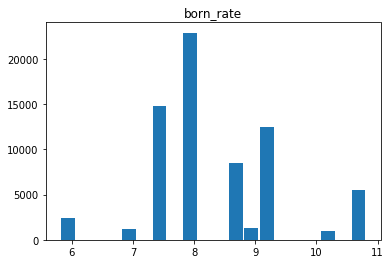

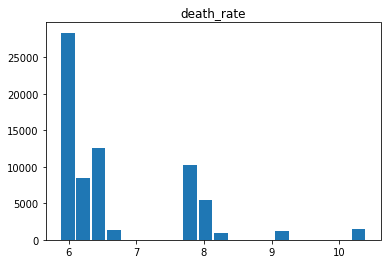

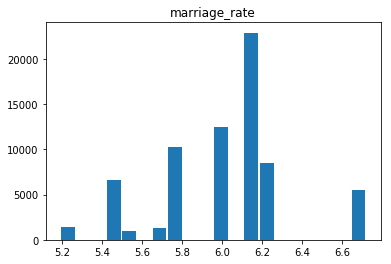

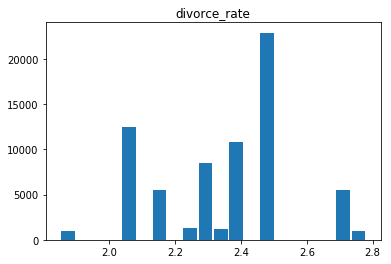

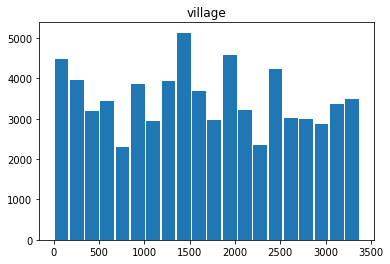

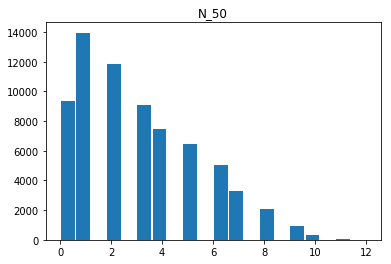

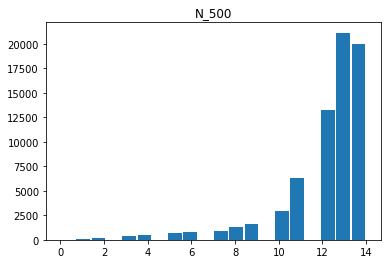

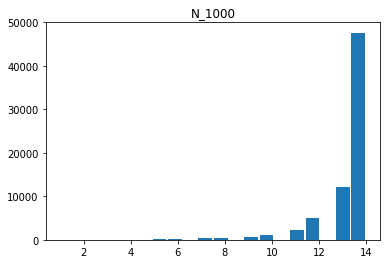

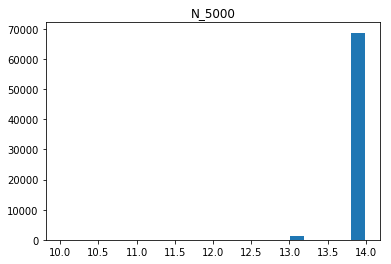

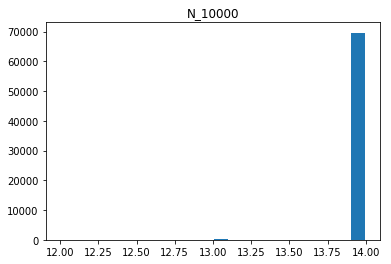

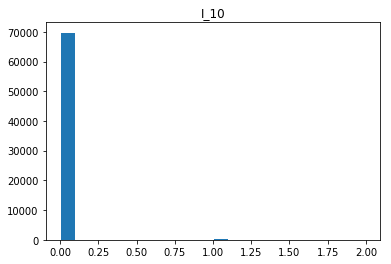

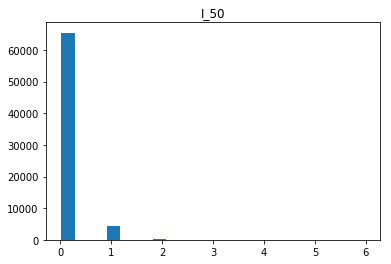

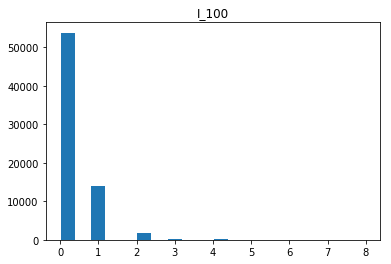

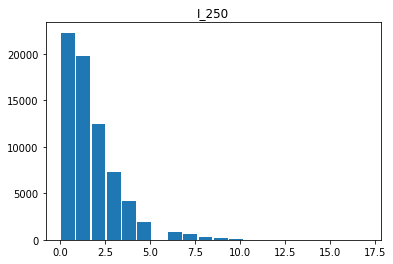

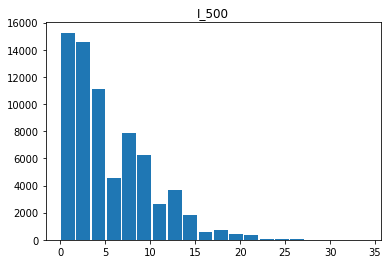

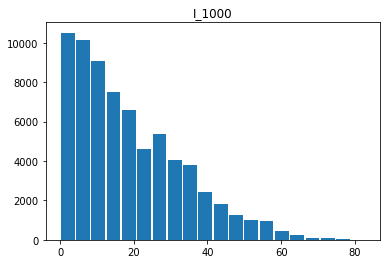

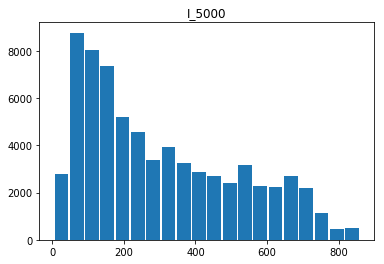

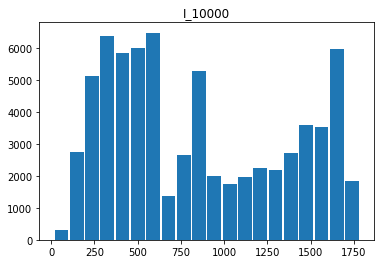

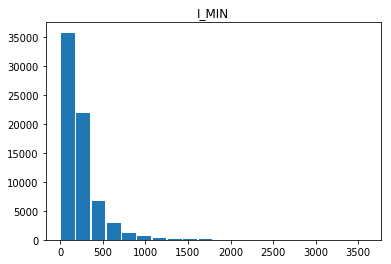

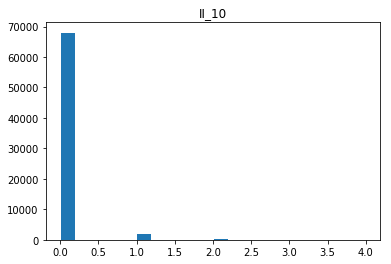

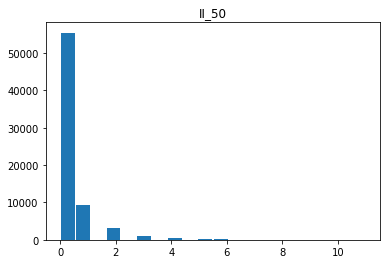

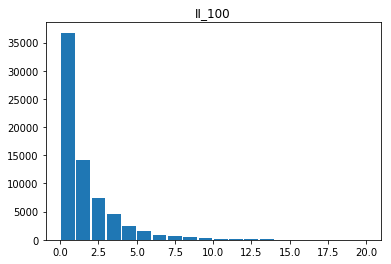

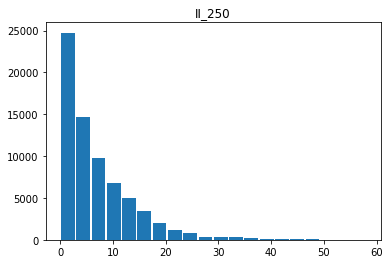

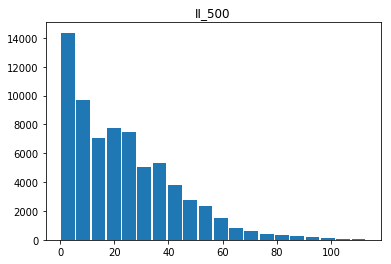

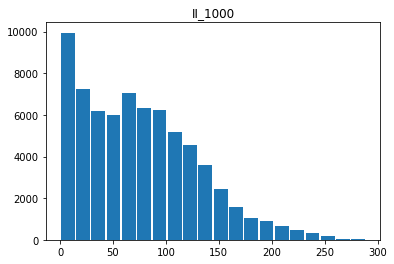

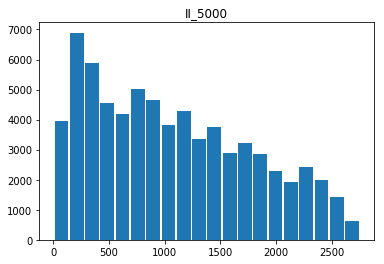

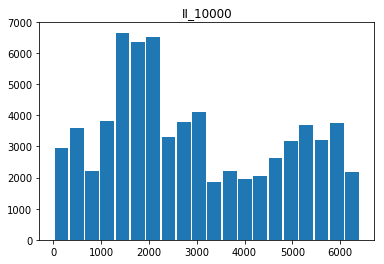

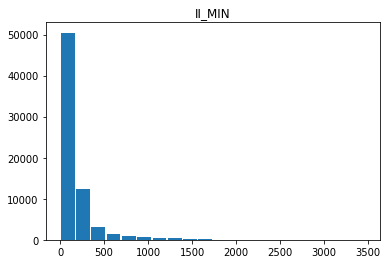

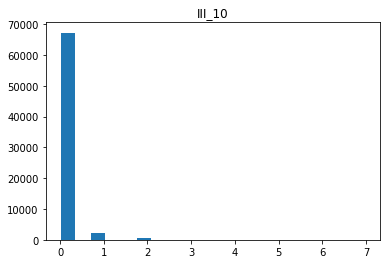

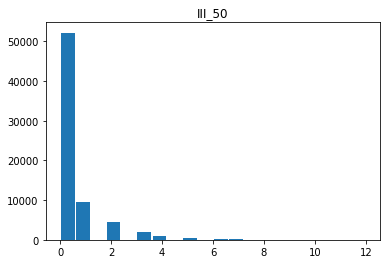

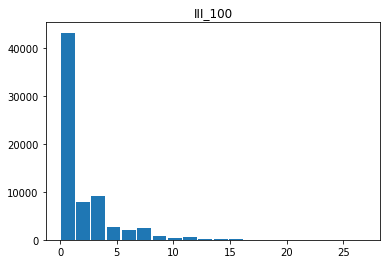

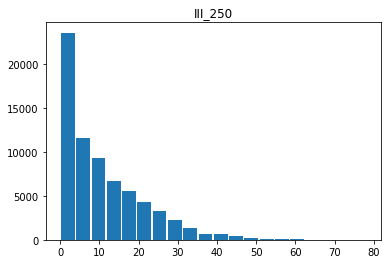

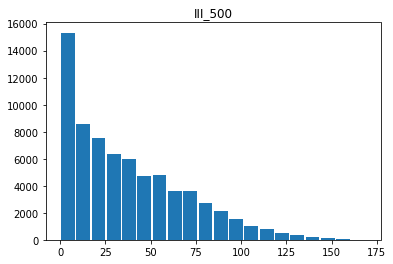

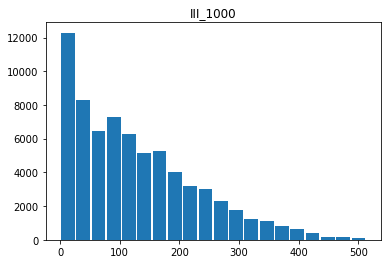

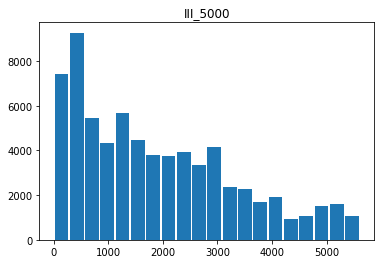

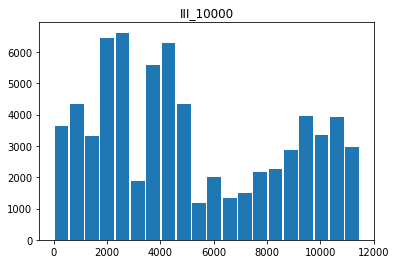

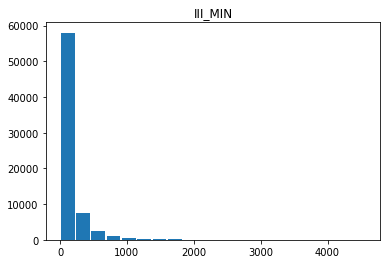

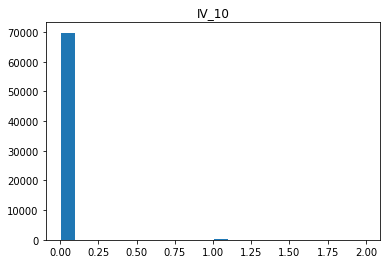

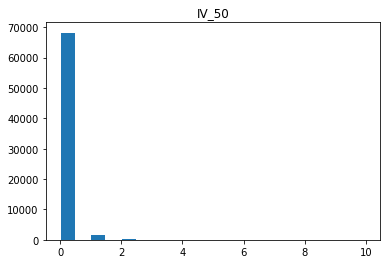

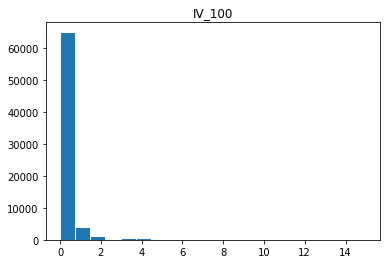

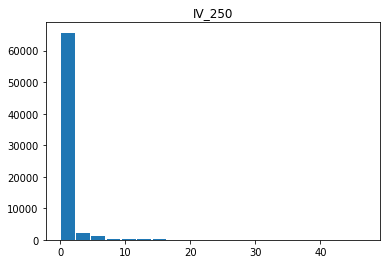

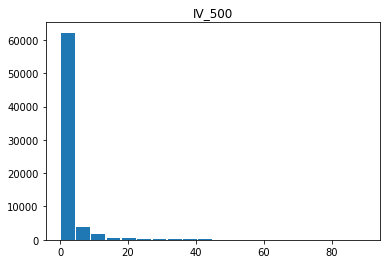

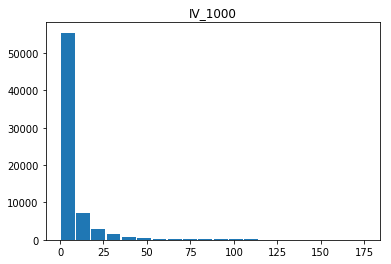

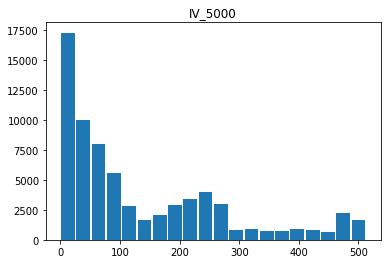

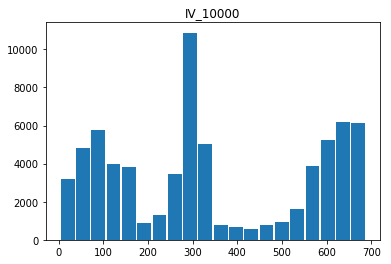

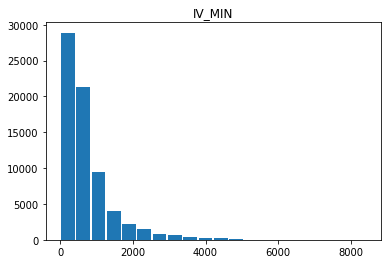

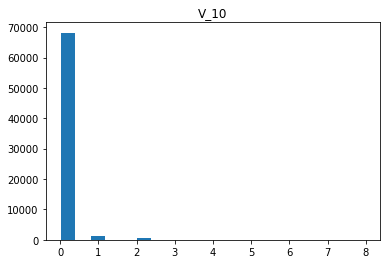

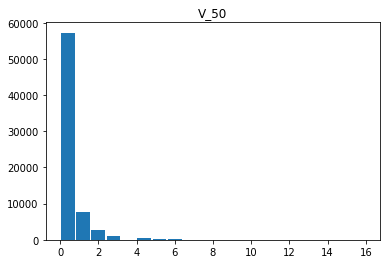

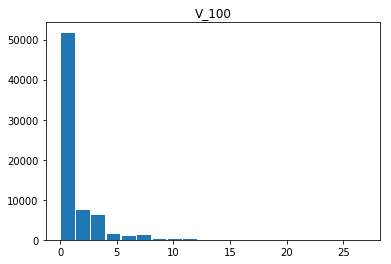

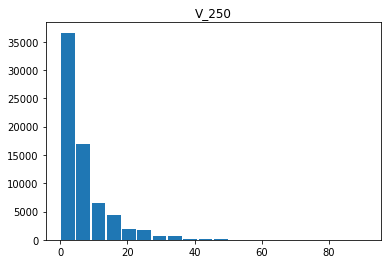

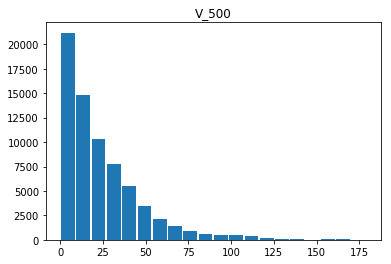

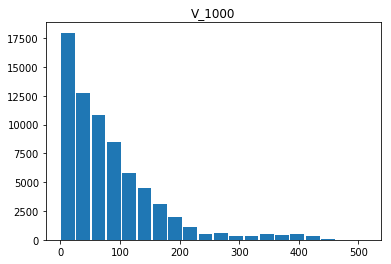

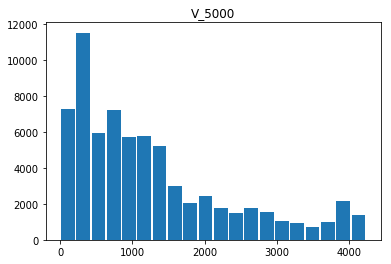

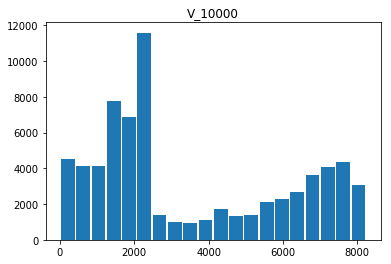

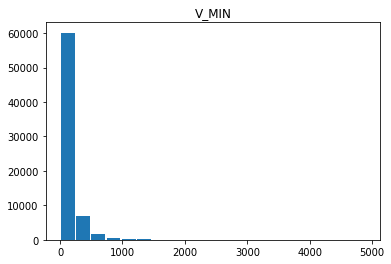

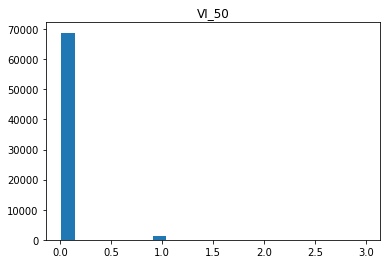

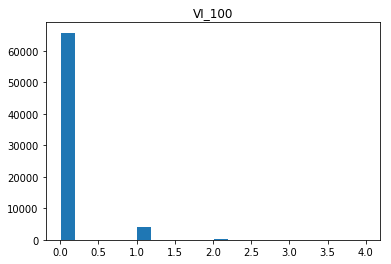

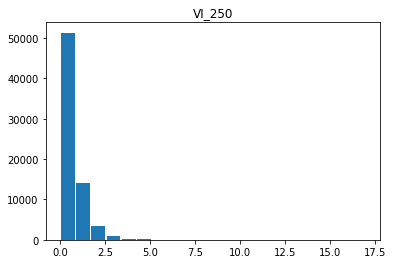

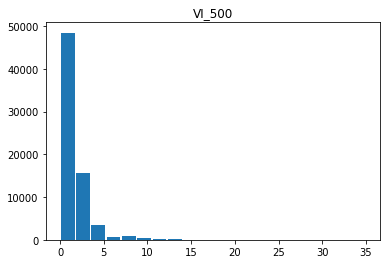

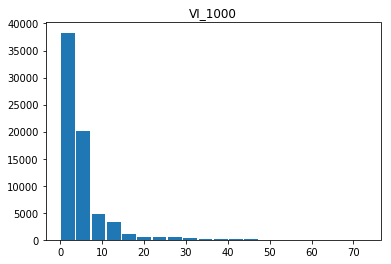

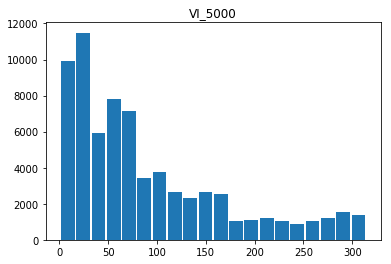

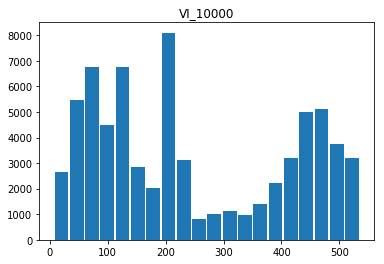

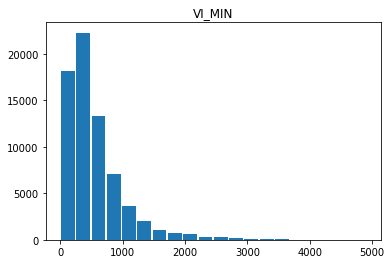

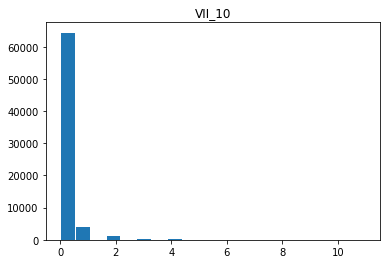

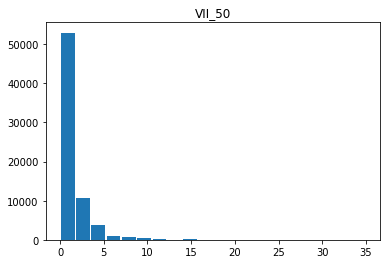

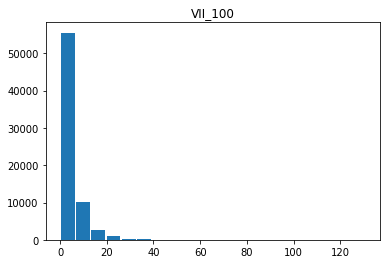

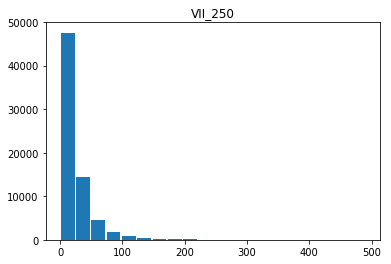

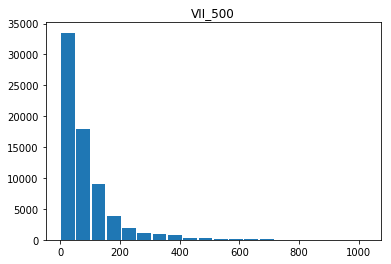

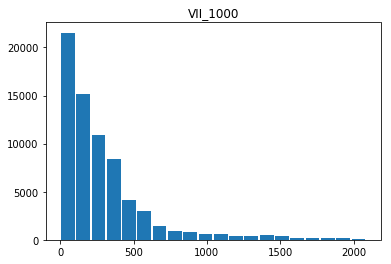

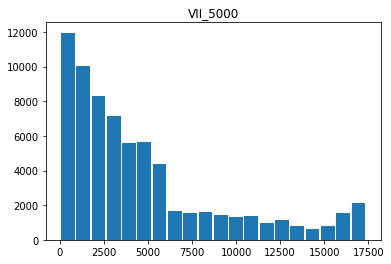

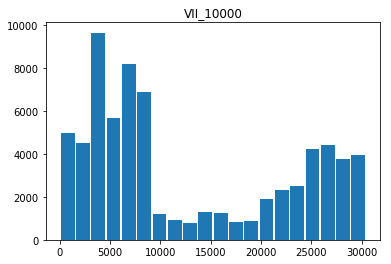

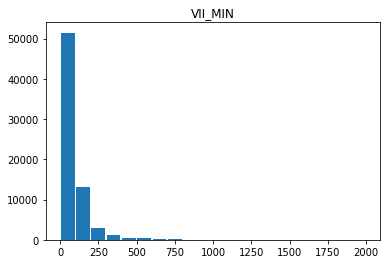

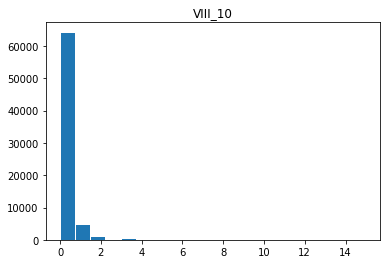

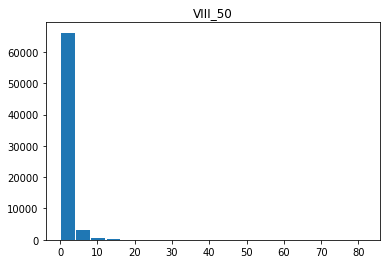

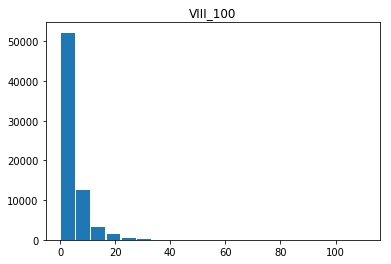

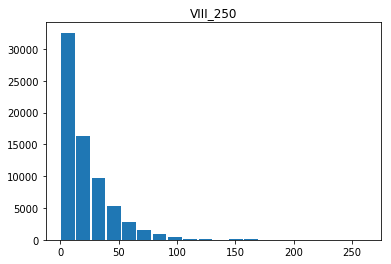

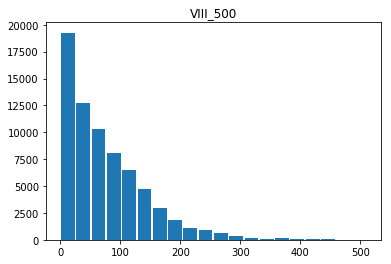

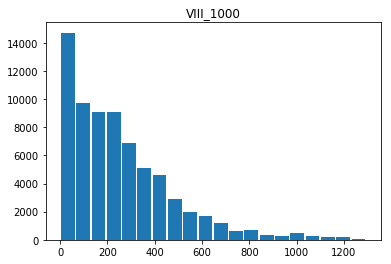

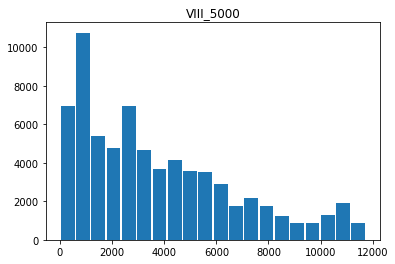

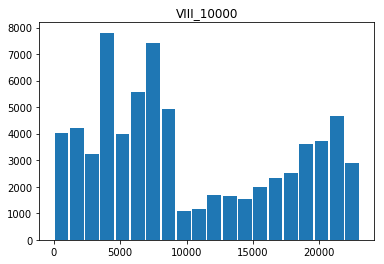

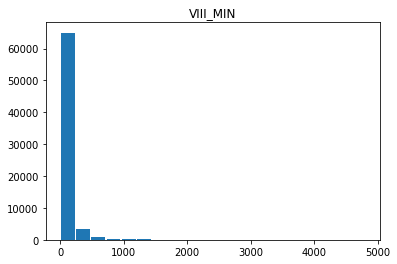

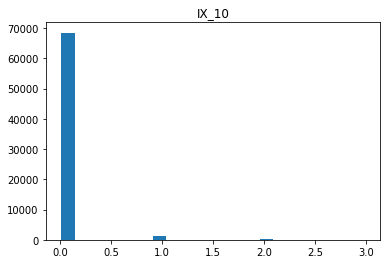

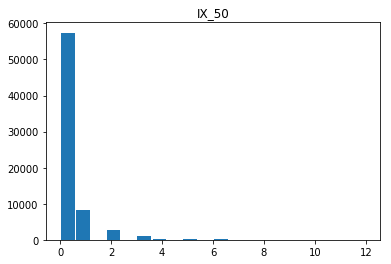

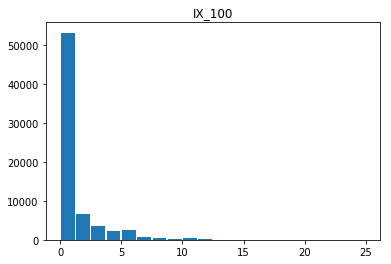

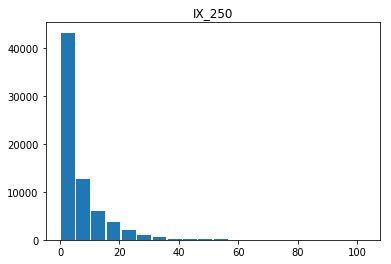

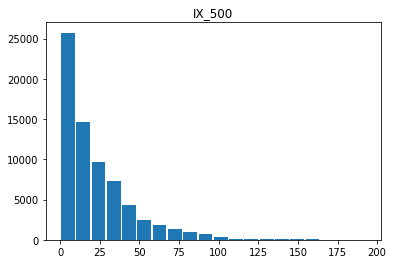

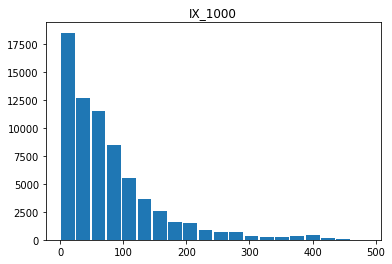

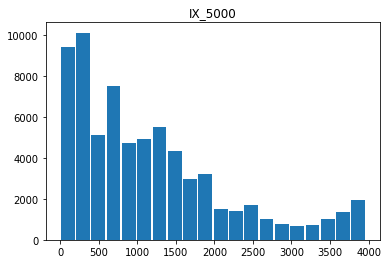

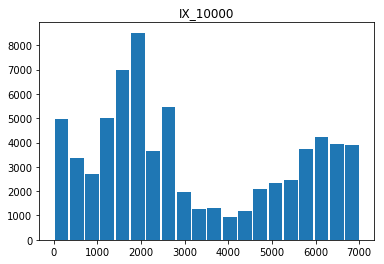

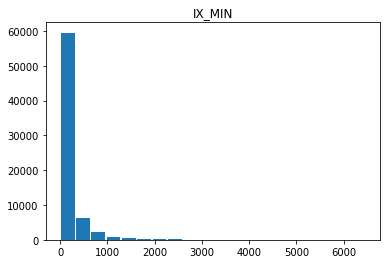

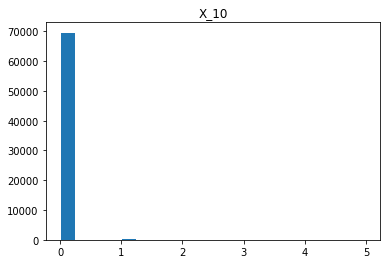

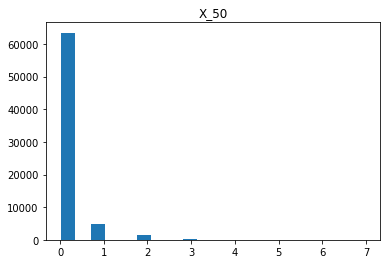

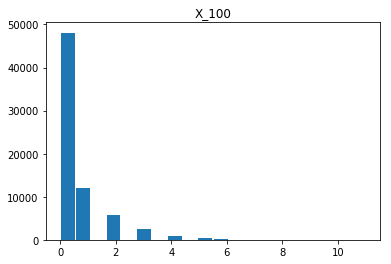

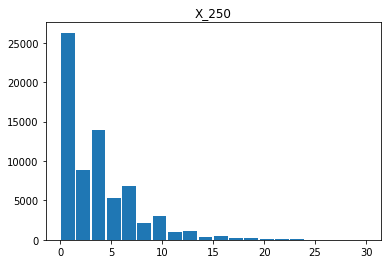

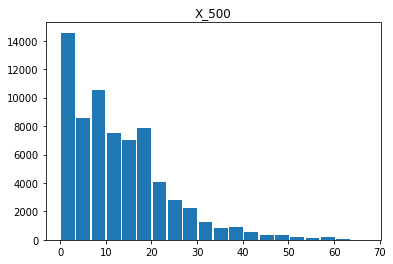

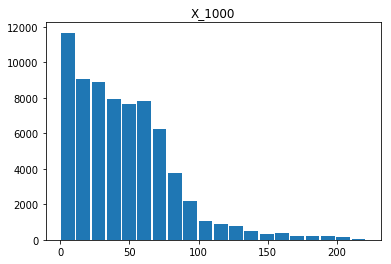

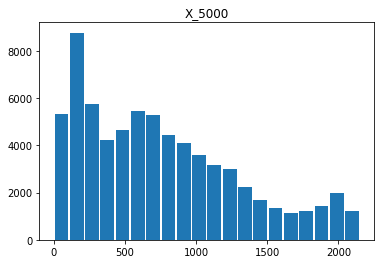

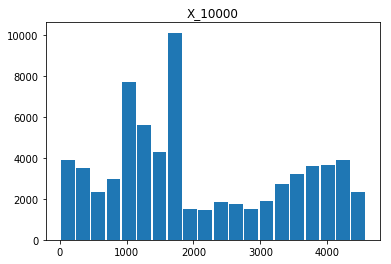

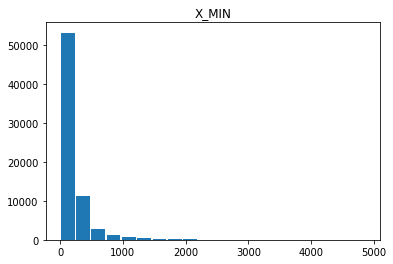

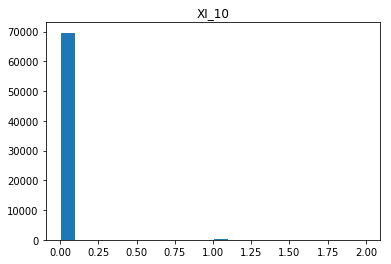

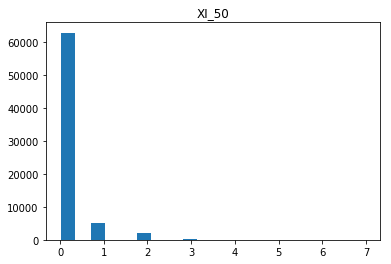

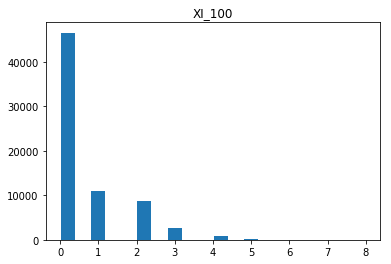

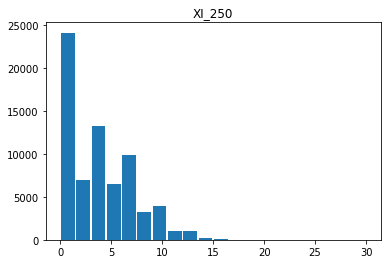

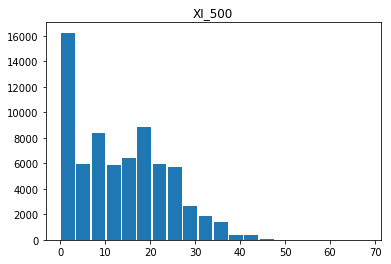

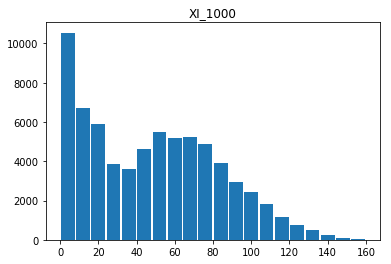

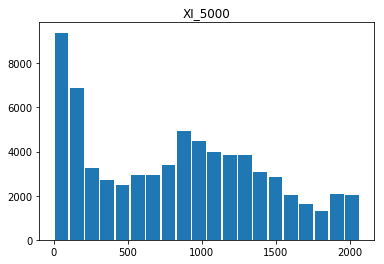

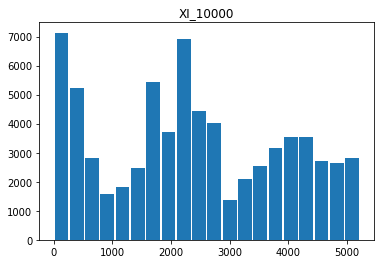

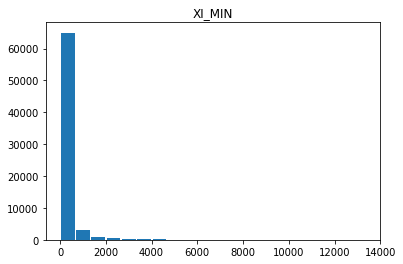

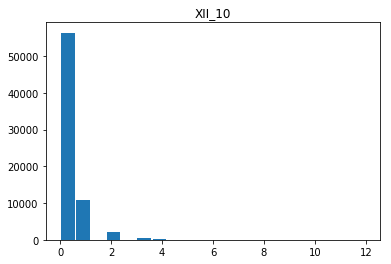

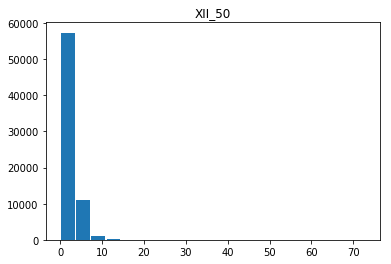

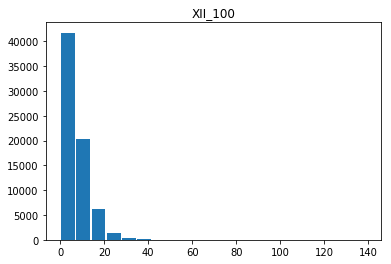

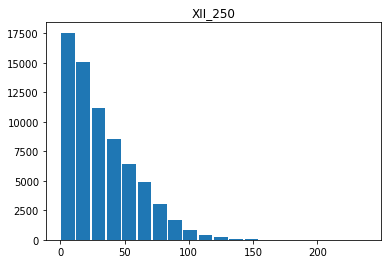

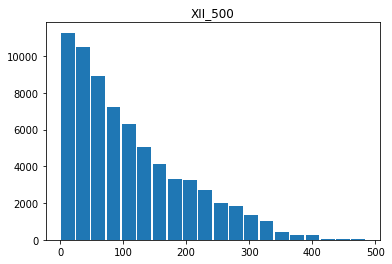

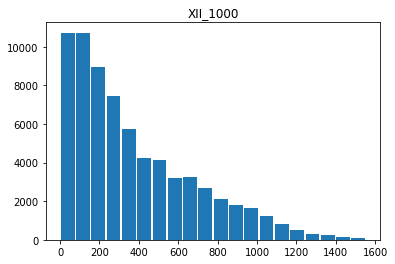

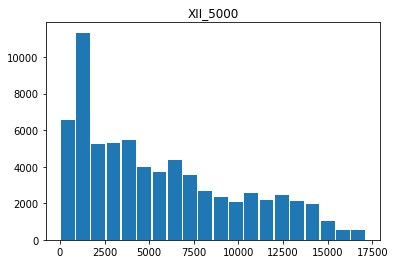

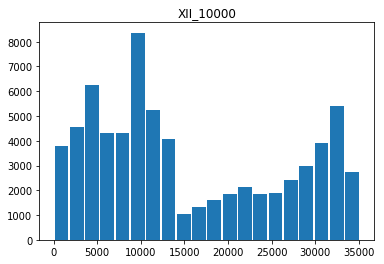

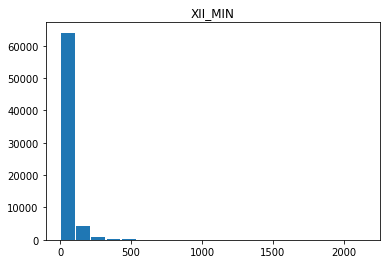

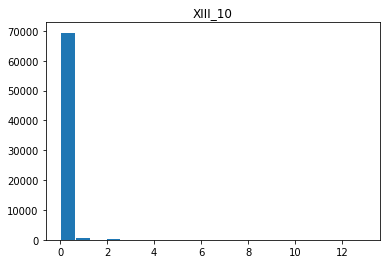

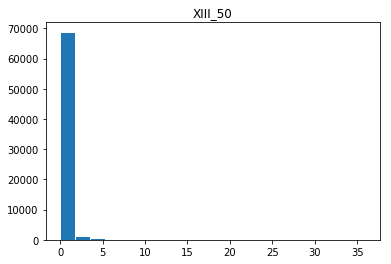

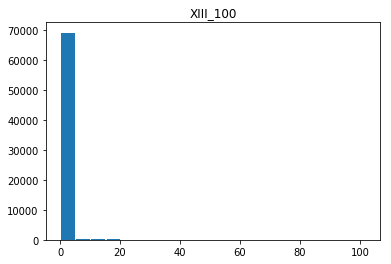

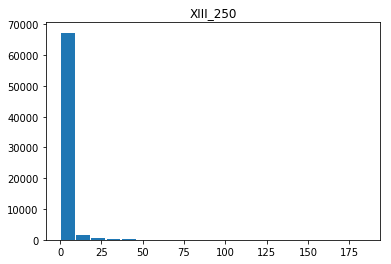

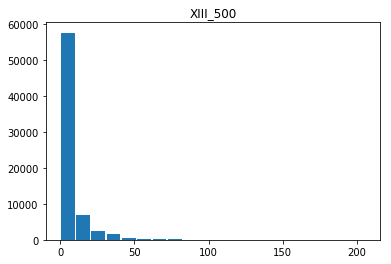

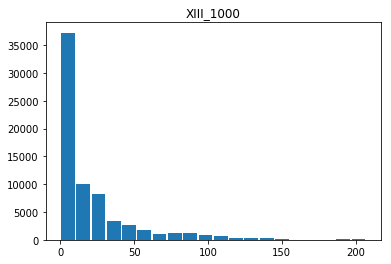

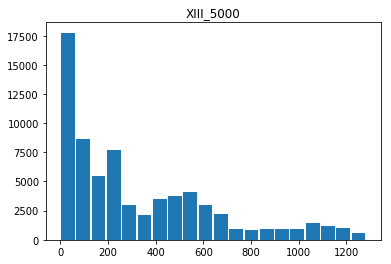

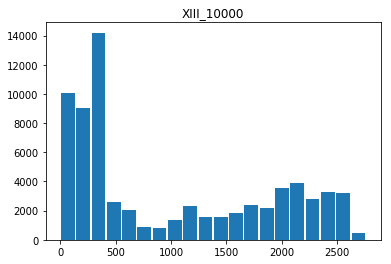

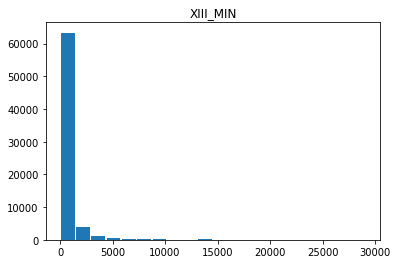

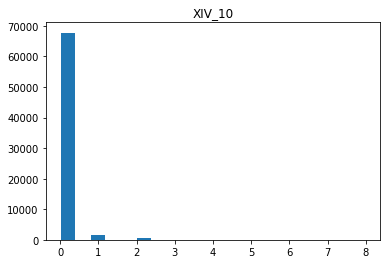

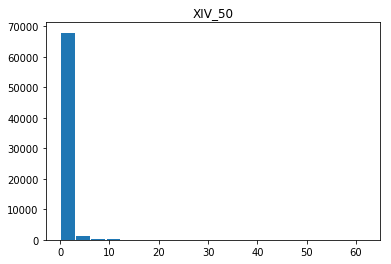

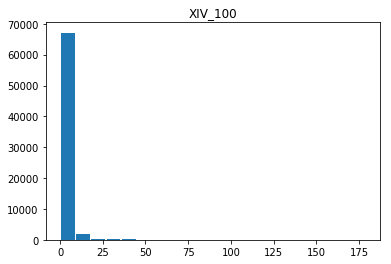

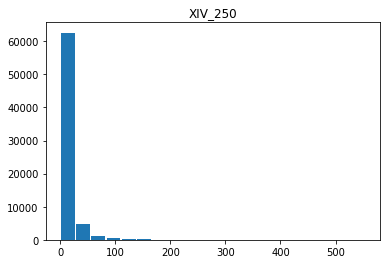

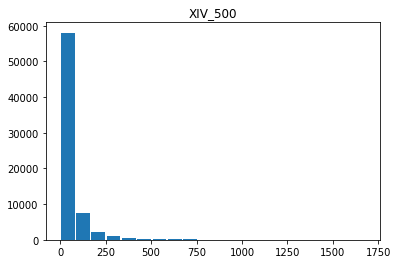

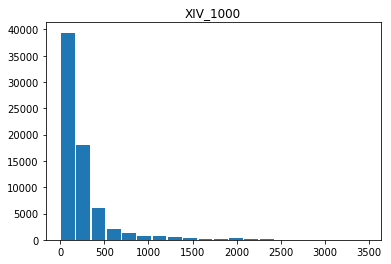

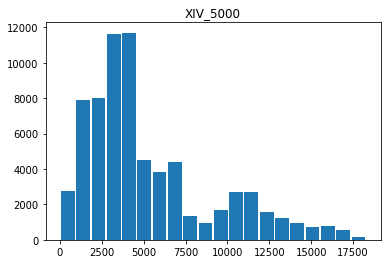

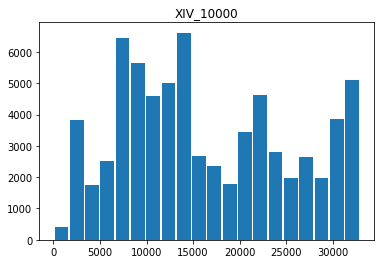

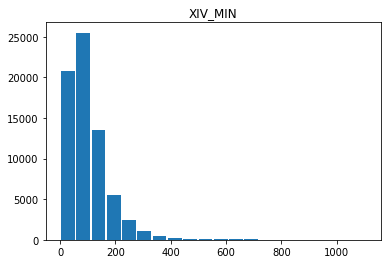

In [330]:
numeric_columns = df.columns

print(len(numeric_columns))

for col in numeric_columns:
    plt.hist(df[col].dropna(), bins=20, rwidth=0.9)
    plt.title(col)
    plt.show()

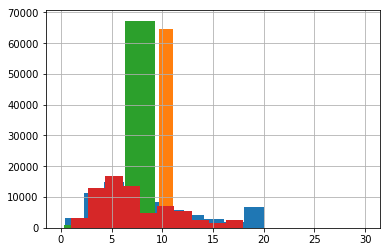

In [350]:
from scipy import stats

df['building_area'] = df['building_area'].clip(0.3, 20)
df['building_area'].hist()

df['parking_price'].replace({np.nan: df['parking_price'].mean()}, inplace = True)
df['parking_price'] = df['parking_price']+1
df['parking_price'] = stats.boxcox(df['parking_price'], lmbda=0)
df['parking_price'].hist()

df['parking_area'].replace({np.nan: df['parking_area'].mean()}, inplace = True)
df['parking_area'] = df['parking_area'].clip(0.35, 30)
df['parking_area'].hist()

df['land_area'] = df['land_area'].clip(2.22, 100)
df['land_area'] = stats.boxcox(df['land_area'], lmbda=0.5)
df['land_area'].hist()

In [351]:
df = df.fillna(df.median())
#MAEncoder = MaxAbsScaler()
#df = MAEncoder.fit_transform(df)

In [352]:
train_num = train_Y.shape[0]
train_X = df[:train_num]

estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8822911693925759

In [280]:
estimator.fit(train_X, train_Y)

test_X = df[train_num:]
predict = estimator.predict(test_X)

test_price = np.expm1(predict)

submit = pd.DataFrame(ids)
submit['total_price'] = test_price.astype(np.int32)
submit.to_csv("2019-05-09.csv",index=False)